In [88]:
from random import randint
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Creating test data

In [62]:
test_samples = []
test_labels = []

In [63]:
for i in range(50):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(64, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(64, 100)
    test_samples.append(random_older)
    test_labels.append(1)

### Formating test data

In [64]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Creating Model

In [66]:
model = Sequential([
    Dense(units=16, input_shape=(1, ), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax"),
])

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                32        
                                                                 
 dense_14 (Dense)            (None, 32)                544       
                                                                 
 dense_15 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Training Model

In [69]:
model.fit(x=scaled_test_samples, y=test_labels, validation_split=0.1, epochs=30, batch_size=10, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6678 - accuracy: 0.5667 - val_loss: 0.6513 - val_accuracy: 0.6000 - 666ms/epoch - 4ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6410 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6714 - 234ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6135 - accuracy: 0.6704 - val_loss: 0.5952 - val_accuracy: 0.7286 - 255ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5842 - accuracy: 0.7243 - val_loss: 0.5628 - val_accuracy: 0.7667 - 253ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5499 - accuracy: 0.7683 - val_loss: 0.5305 - val_accuracy: 0.8000 - 242ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5183 - accuracy: 0.7979 - val_loss: 0.5006 - val_accuracy: 0.8238 - 247ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4883 - accuracy: 0.8196 - val_loss: 0.4725 - val_accuracy: 0.8381 - 245ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4602 - accuracy: 0.8423 - val_loss: 0.4464 - val_accuracy: 0.8429 - 236ms/epoch - 1ms/step


### Making Model predict

In [78]:
predictions = model.predict(x=scaled_test_samples, batch_size=1, verbose=0)
predictions = np.argmax(predictions, axis=-1)

In [79]:
for i in predictions:
    print(i)

0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
0
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
0
1
0
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0


In [80]:
for i in test_labels:
    print(i)

0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
1
1
0
1
1
1
0
0
0


# Creating Confusion Matrix

In [82]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions)

In [90]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

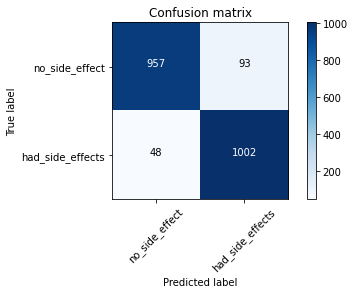

In [89]:
cm_plot_labels = ["no_side_effect", "had_side_effects"]
plot_confusion_matrix(cm, classes=cm_plot_labels)

# Saving and loading model

In [91]:
import os
if os.path.isfile("./models/medical_train_model.h5") is False:
    model.save("./models/medical_train_model.h5")

In [92]:
from tensorflow.keras.models import load_model
new_model = load_model("./models/medical_train_model.h5")

In [93]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
